<a href="https://colab.research.google.com/github/IronAvenger11-prog/Complete-Tensorflow-2-and-Deep-Learning-Bootcamp/blob/main/RNNAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('IPN31152N.csv',index_col='DATE',parse_dates=True)

In [15]:
df

,IPN31152N
DATE,
1972-01-01,60.1527
1972-02-01,67.2736
1972-03-01,74.4710
1972-04-01,78.3605
1972-05-01,85.0332
...,...
2021-02-01,101.2105
2021-03-01,111.4117
2021-04-01,110.6197


In [16]:
df_new = df.rename(columns = {"IPN31152N":"PRODUCTION"})

In [17]:
df_new

,PRODUCTION
DATE,
1972-01-01,60.1527
1972-02-01,67.2736
1972-03-01,74.4710
1972-04-01,78.3605
1972-05-01,85.0332
...,...
2021-02-01,101.2105
2021-03-01,111.4117
2021-04-01,110.6197


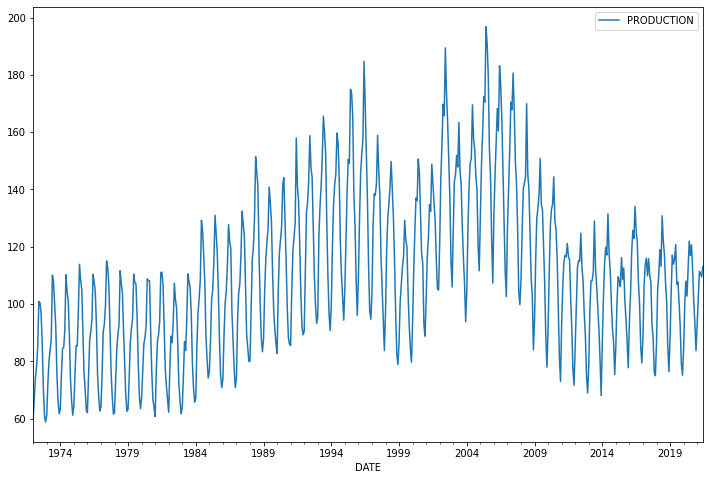

In [18]:
df_new.plot(figsize=(12,8))

In [19]:
len(df_new)

594

In [20]:
len(df_new)-18


576

In [21]:
test_size = 18

In [27]:
test_ind = len(df_new)- test_size

In [26]:
train = df_new.iloc[:test_ind]
test = df_new.iloc[test_ind:]

In [28]:
train

,PRODUCTION
DATE,
1972-01-01,60.1527
1972-02-01,67.2736
1972-03-01,74.4710
1972-04-01,78.3605
1972-05-01,85.0332
...,...
2019-08-01,107.7196
2019-09-01,100.6381
2019-10-01,91.9778


In [29]:
test

,PRODUCTION
DATE,
2020-01-01,84.1969
2020-02-01,99.7767
2020-03-01,108.0301
2020-04-01,102.7954
2020-05-01,112.5288
2020-06-01,122.0301
2020-07-01,116.9799
2020-08-01,120.7120
2020-09-01,111.8634


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [33]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [34]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [35]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [36]:
X,y = generator[0]

In [37]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00946848 0.06107908 0.11324413 0.1414343  0.18979645 0.30491195
 0.30149681 0.27411766 0.19733775 0.08531415 0.01561386 0.        ]
Predict this y: 
 [[0.01773963]]


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
n_features = 1

In [40]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',patience=2)

In [43]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length = length,batch_size=1)


In [47]:
model.fit_generator(generator,epochs=25,
                    validation_data=validation_generator,
                   callbacks=[early_stop])


Epoch 1/25
 19/564 [>.............................] - ETA: 3s - loss: 0.0125

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


564/564 [==============================] - 4s 6ms/step - loss: 0.0046 - val_loss: 0.0063
Epoch 2/25
564/564 [==============================] - 3s 6ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 3/25
564/564 [==============================] - 4s 6ms/step - loss: 0.0039 - val_loss: 0.0017
Epoch 4/25
564/564 [==============================] - 4s 6ms/step - loss: 0.0039 - val_loss: 0.0036


In [48]:
losses = pd.DataFrame(model.history.history)

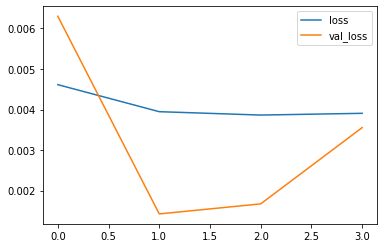

In [49]:
losses.plot()

In [50]:
first_eval_batch = scaled_train[-length:]

In [52]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))


In [53]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [54]:
true_predictions = scaler.inverse_transform(test_predictions)

In [55]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
test

,PRODUCTION,Predictions
DATE,,
2020-01-01,84.1969,92.911358
2020-02-01,99.7767,107.415417
2020-03-01,108.0301,118.534200
2020-04-01,102.7954,125.986032
2020-05-01,112.5288,131.462071
2020-06-01,122.0301,131.658654
2020-07-01,116.9799,126.944861
2020-08-01,120.7120,120.763576
2020-09-01,111.8634,110.564788


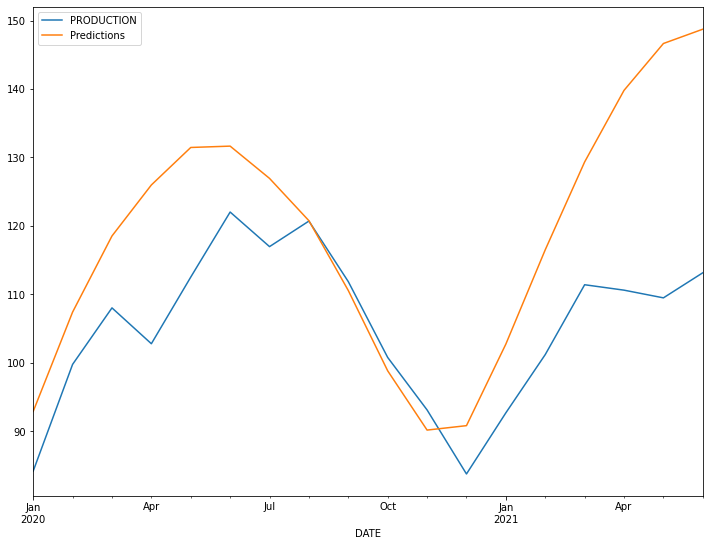

In [57]:
test.plot(figsize=(12,9))

In [58]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [59]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [60]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=8)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
582/582 [==============================] - 5s 6ms/step - loss: 0.0177
Epoch 2/8
582/582 [==============================] - 4s 6ms/step - loss: 0.0164
Epoch 3/8
582/582 [==============================] - 4s 7ms/step - loss: 0.0044
Epoch 4/8
582/582 [==============================] - 4s 7ms/step - loss: 0.0042
Epoch 5/8
582/582 [==============================] - 4s 6ms/step - loss: 0.0036
Epoch 6/8
582/582 [==============================] - 4s 6ms/step - loss: 0.0037
Epoch 7/8
582/582 [==============================] - 4s 6ms/step - loss: 0.0038
Epoch 8/8
582/582 [==============================] - 4s 6ms/step - loss: 0.0032


In [63]:
forecast = []

periods = 12
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [64]:
forecast = scaler.transform(forecast)

In [67]:
df_new

,PRODUCTION
DATE,
1972-01-01,60.1527
1972-02-01,67.2736
1972-03-01,74.4710
1972-04-01,78.3605
1972-05-01,85.0332
...,...
2021-02-01,101.2105
2021-03-01,111.4117
2021-04-01,110.6197


In [69]:
forecast_index = pd.date_range(start='2019-11-01',periods = periods,freq='MS')

In [70]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])


In [71]:
forecast_df

,Forecast
2019-11-01,-0.423113
2019-12-01,-0.423057
2020-01-01,-0.423318
2020-02-01,-0.423752
2020-03-01,-0.424146
2020-04-01,-0.424412
2020-05-01,-0.424275
2020-06-01,-0.423897
2020-07-01,-0.423469
2020-08-01,-0.423147


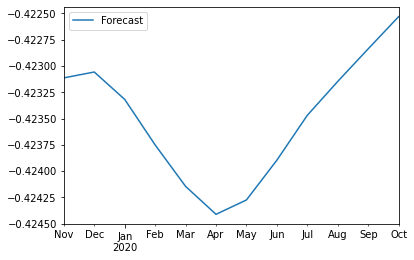

In [72]:
forecast_df.plot()

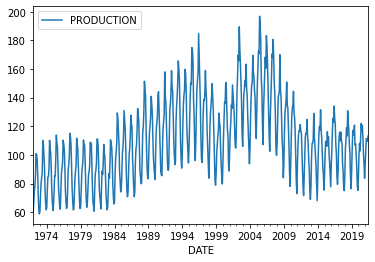

In [74]:
df_new.plot()

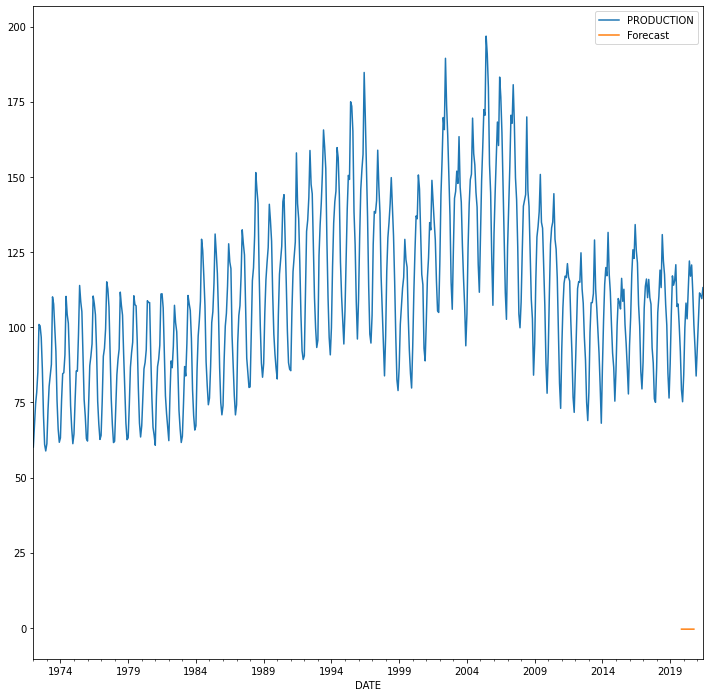

In [77]:
ax = df_new.plot()
forecast_df.plot(ax=ax,figsize=(12,12))

(576.0, 611.0)

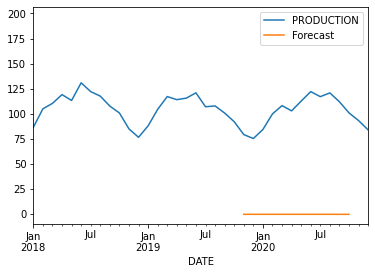

In [78]:
ax = df_new.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')